# Compare the different scores, cosines, spec2vec and Tanimoto

To compute the differences of similarity algorithms the following filters were used:

Filters:
* normalize_intensities(s)
* select_by_mz(s, mz_from=0, mz_to=1000)
* select_by_relative_intensity(s, intensity_from=0.05, intensity_to=1.0)

In [3]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Importing Spec2vec Similarities

### Spec2vec training model params:
- documents=reference_documents
- filename=model_file
- size=400
- iterations=[10, 20, 30]
- workers=2

### spec2vec reference model to compute differences
- model_file = "references_iter_10.model"

In [5]:
import numpy as np

filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size2.npy")
matrix_similarities_spec2vec2 = np.load(filename)

In [95]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size50.npy")
matrix_similarities_spec2vec50 = np.load(filename)

In [7]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size100.npy")
matrix_similarities_spec2vec100 = np.load(filename)

In [8]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size500.npy")
matrix_similarities_spec2vec500 = np.load(filename)

In [105]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size600.npy")
matrix_similarities_spec2vec600 = np.load(filename)

In [9]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size650.npy")
matrix_similarities_spec2vec650 = np.load(filename)

In [10]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size700.npy")
matrix_similarities_spec2vec700 = np.load(filename)

In [11]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size750.npy")
matrix_similarities_spec2vec750 = np.load(filename)

In [12]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_reference10_size800.npy")
matrix_similarities_spec2vec800 = np.load(filename)

Text(0, 0.5, "Mean molecular similarity (f(t,t') within that percentile)")

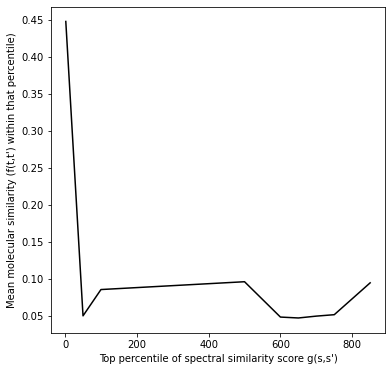

In [113]:
from matplotlib import pyplot as plt

show_top_percentile = 25
scores, dimensions = [], []

def get_mean_percentile(arr_data, show_top_percentile):
    start = int(arr_data.shape[0] * show_top_percentile / 100)
    arr_mean = np.array([np.mean(s) for s in arr_data])
    arr_mean = np.sort(arr_mean)
    return arr_mean[start]

scores.append(get_mean_percentile(matrix_similarities_spec2vec2, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec50, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec100, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec500, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec600, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec650, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec700, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec750, show_top_percentile))
scores.append(get_mean_percentile(matrix_similarities_spec2vec800, show_top_percentile))

scores = np.array(scores)
dimensions = [2, 50, 100, 500, 600, 650, 700, 750, 850]

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(
    dimensions,
    scores,
    color='black')
#plt.xticks(np.linspace(0, show_top_percentile, 5),
#           ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
#if title is not None:
#    plt.suptitle(title, fontsize=16)
plt.xlabel("Top percentile of spectral similarity score g(s,s')")
plt.ylabel("Mean molecular similarity (f(t,t') within that percentile)")


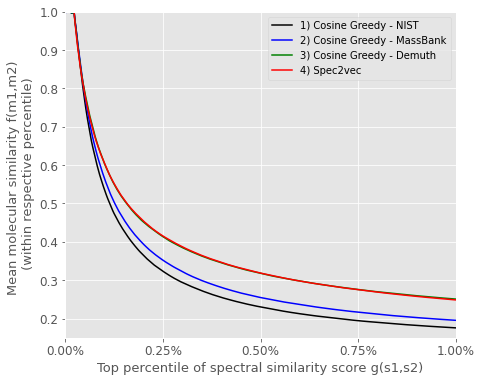

In [23]:
import matplotlib.pyplot as plt

num_bins = 1000
show_top_percentile = 1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_cosine_nist,
         color="black", label="1) Cosine Greedy - NIST")
plt.plot(x_percentiles, percentile_cosine_massbank,
         color="blue", label="2) Cosine Greedy - MassBank")
plt.plot(x_percentiles, percentile_cosine_demuth,
         color="green", label="3) Cosine Greedy - Demuth")
plt.plot(x_percentiles, percentile_cosine_spec2vec,
         color="red", label="4) Spec2vec")

    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, show_top_percentile, 5), 
          ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.xlim(0, 1)
plt.ylim(0.15, 1)
plt.savefig(os.path.join(path, "Benchmarking_top_percentil_comparison2_filter01.png"))